In [24]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import scipy.stats as scs
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from IPython.display import HTML, display

In [25]:
df = pd.read_csv("shareViewDataRM-ext.csv")

In [26]:
df.columns = df.columns.str.lstrip()

In [27]:
df.columns = df.columns.str.lower()

In [28]:
df.columns = df.columns.str.replace(" ", "_")

In [29]:
df.head()

,activity_type,user_id,rm_id,user_os,viewing_app,view_app_group,user_groups,shared_date,shared_hour,shared_time,title_of_content,share_channel,viewed,time_spent_in_seconds,last_activity_date,last_activity_time
0,SHARE,5931852,197521.0,NaN,NaN,NaN,Client Solutions,18-Aug-2017,0.0,0:53:39,English/Writing GameScapes and Games,WEB,1,5505,18-Aug-2017,22:43:00
1,VIEW,5931852,NaN,WINDOWS_7,CHROME,CHROME,NaN,NaN,NaN,NaN,Introductions and Conclusions: Set the Stage,NaN,1,285,18-Aug-2017,22:37:45
2,VIEW,5931852,NaN,WINDOWS_7,CHROME,CHROME,NaN,NaN,NaN,NaN,Paragraph Structure: Find the Balance,NaN,1,1635,18-Aug-2017,22:00:03
3,VIEW,5931852,NaN,WINDOWS_7,CHROME,CHROME,NaN,NaN,NaN,NaN,Paragraph Structure: Find the Balance,NaN,1,3555,18-Aug-2017,21:00:01
4,VIEW,5931852,NaN,WINDOWS_7,CHROME,CHROME,NaN,NaN,NaN,NaN,Paragraph Structure: Find the Balance,NaN,1,30,18-Aug-2017,20:59:28


In [30]:
df["last_activity_date"] = pd.to_datetime(df["last_activity_date"], format="%d-%b-%Y")

In [31]:
df['weekday'] = df['last_activity_date'].dt.dayofweek

In [32]:
df.head(10)

,activity_type,user_id,rm_id,user_os,viewing_app,view_app_group,user_groups,shared_date,shared_hour,shared_time,title_of_content,share_channel,viewed,time_spent_in_seconds,last_activity_date,last_activity_time,weekday
0,SHARE,5931852,197521.0,NaN,NaN,NaN,Client Solutions,18-Aug-2017,0.0,0:53:39,English/Writing GameScapes and Games,WEB,1,5505,2017-08-18,22:43:00,4
1,VIEW,5931852,NaN,WINDOWS_7,CHROME,CHROME,NaN,NaN,NaN,NaN,Introductions and Conclusions: Set the Stage,NaN,1,285,2017-08-18,22:37:45,4
2,VIEW,5931852,NaN,WINDOWS_7,CHROME,CHROME,NaN,NaN,NaN,NaN,Paragraph Structure: Find the Balance,NaN,1,1635,2017-08-18,22:00:03,4
3,VIEW,5931852,NaN,WINDOWS_7,CHROME,CHROME,NaN,NaN,NaN,NaN,Paragraph Structure: Find the Balance,NaN,1,3555,2017-08-18,21:00:01,4
4,VIEW,5931852,NaN,WINDOWS_7,CHROME,CHROME,NaN,NaN,NaN,NaN,Paragraph Structure: Find the Balance,NaN,1,30,2017-08-18,20:59:28,4
5,SHARE,5864595,197521.0,NaN,NaN,NaN,Client Solutions,10-Aug-2017,3.0,3:27:06,English/Writing GameScapes and Games,WEB,1,1240,2017-08-18,20:56:00,4
6,VIEW,5864595,NaN,WINDOWS_7,IE11,IE11,NaN,NaN,NaN,NaN,Thesis Statements: What's the Point?,NaN,1,5,2017-08-18,20:55:11,4
7,SHARE,5926033,197521.0,NaN,NaN,NaN,Client Solutions,17-Aug-2017,21.0,21:41:24,Business Foundations,WEB,0,0,2017-08-17,21:41:24,3
8,SHARE,3837716,197521.0,NaN,NaN,NaN,Client Solutions,17-Aug-2017,21.0,21:33:05,Business Foundations,WEB,1,51490,2017-08-17,21:33:05,3
9,VIEW,197521,NaN,WINDOWS_10,CHROME,CHROME,NaN,NaN,NaN,NaN,DEMO - Planning and Writing,NaN,1,350,2017-08-17,3:11:48,3


In [33]:
df['hour'] = pd.to_datetime(df['last_activity_time'], format='%H:%M:%S').dt.hour

In [34]:
df.viewed.unique()

array([1, 0])

In [35]:
df["time_spent_mins"] = df["time_spent_in_seconds"]/60.

In [36]:
hour_grouped = df.groupby("hour")["time_spent_mins"].sum()
type(hour_grouped)

pandas.core.series.Series

<Container object of 24 artists>

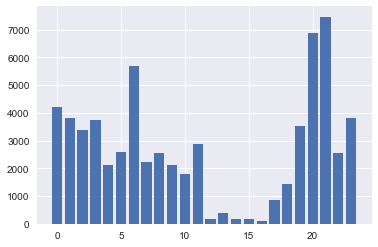

In [37]:
plt.bar(xrange(0,24),hour_grouped)

In [38]:
users = df.user_id.unique()
users = np.array(users)
np.sort(users)
df.loc[(df.user_id < 1000001),'user_id_group'] = 1
df.loc[(df.user_id > 1000000) & (df.user_id < 1500001),'user_id_group'] = 2
df.loc[(df.user_id > 1500000) & (df.user_id < 2000001),'user_id_group'] = 3
df.loc[(df.user_id > 2000000) & (df.user_id < 2500001),'user_id_group'] = 4
df.loc[(df.user_id > 2500000) & (df.user_id < 3000001),'user_id_group'] = 5
df.loc[(df.user_id > 3000000) & (df.user_id < 3500001),'user_id_group'] = 6
df.loc[(df.user_id > 3500000) & (df.user_id < 4000001),'user_id_group'] = 7
df.loc[(df.user_id > 4000000) & (df.user_id < 4500001),'user_id_group'] = 8
df.loc[(df.user_id > 4500000) & (df.user_id < 5000001),'user_id_group'] = 9
df.loc[(df.user_id > 5000000) & (df.user_id < 5500001),'user_id_group'] = 10
df.loc[(df.user_id > 5500000) & (df.user_id < 6000001),'user_id_group'] = 11


In [39]:
df.head()

,activity_type,user_id,rm_id,user_os,viewing_app,view_app_group,user_groups,shared_date,shared_hour,shared_time,title_of_content,share_channel,viewed,time_spent_in_seconds,last_activity_date,last_activity_time,weekday,hour,time_spent_mins,user_id_group
0,SHARE,5931852,197521.0,NaN,NaN,NaN,Client Solutions,18-Aug-2017,0.0,0:53:39,English/Writing GameScapes and Games,WEB,1,5505,2017-08-18,22:43:00,4,22,91.75,11.0
1,VIEW,5931852,NaN,WINDOWS_7,CHROME,CHROME,NaN,NaN,NaN,NaN,Introductions and Conclusions: Set the Stage,NaN,1,285,2017-08-18,22:37:45,4,22,4.75,11.0
2,VIEW,5931852,NaN,WINDOWS_7,CHROME,CHROME,NaN,NaN,NaN,NaN,Paragraph Structure: Find the Balance,NaN,1,1635,2017-08-18,22:00:03,4,22,27.25,11.0
3,VIEW,5931852,NaN,WINDOWS_7,CHROME,CHROME,NaN,NaN,NaN,NaN,Paragraph Structure: Find the Balance,NaN,1,3555,2017-08-18,21:00:01,4,21,59.25,11.0
4,VIEW,5931852,NaN,WINDOWS_7,CHROME,CHROME,NaN,NaN,NaN,NaN,Paragraph Structure: Find the Balance,NaN,1,30,2017-08-18,20:59:28,4,20,0.50,11.0


In [40]:
df.activity_type.unique()

array(['SHARE', 'VIEW'], dtype=object)

In [46]:
share_df = df[df.activity_type == "SHARE"]
share_df.columns

Index([u'activity_type', u'user_id', u'rm_id', u'user_os', u'viewing_app',
       u'view_app_group', u'user_groups', u'shared_date', u'shared_hour',
       u'shared_time', u'title_of_content', u'share_channel', u'viewed',
       u'time_spent_in_seconds', u'last_activity_date', u'last_activity_time',
       u'weekday', u'hour', u'time_spent_mins', u'user_id_group'],
      dtype='object')

In [47]:
share_df = share_df.drop(["user_os", "viewing_app"], axis=1)

(array([ 5.,  1.,  0.,  0.,  1.,  2.,  0.,  1.,  0.,  1.]),
 array([   3. ,   12.7,   22.4,   32.1,   41.8,   51.5,   61.2,   70.9,
          80.6,   90.3,  100. ]),
 <a list of 10 Patch objects>)

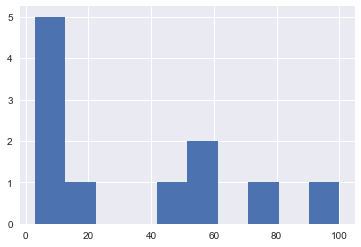

In [48]:
plt.hist(share_df.groupby("user_id_group")["user_id"].count())


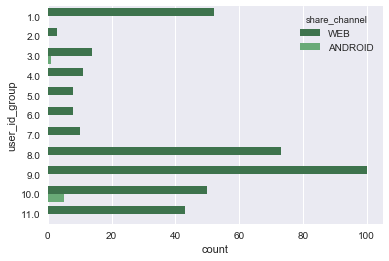

In [57]:
sns.countplot(y="user_id_group", hue="share_channel", data=share_df, palette="Greens_d")

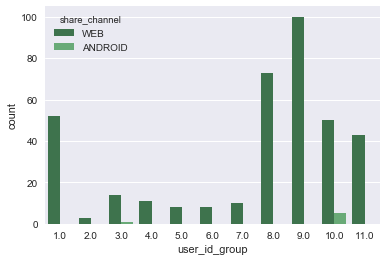

In [83]:
sns.countplot(x="user_id_group", hue="share_channel", data=share_df, palette="Greens_d")

In [58]:
df.user_id_group.unique()

array([ 11.,   7.,   1.,   6.,   4.,   5.,   3.,  10.,   9.,   2.,   8.])

(array([ 581.,    5.,   41.,   32.,   30.,   28.,   24.,  754.,  505.,
         310.,  153.]),
 array([  1.        ,   1.90909091,   2.81818182,   3.72727273,
          4.63636364,   5.54545455,   6.45454545,   7.36363636,
          8.27272727,   9.18181818,  10.09090909,  11.        ]),
 <a list of 11 Patch objects>)

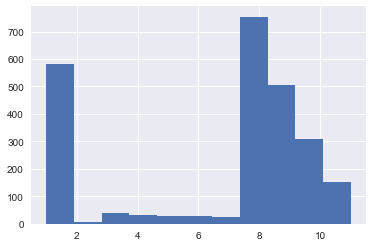

In [59]:
plt.hist(df.user_id_group, bins = 11)

In [84]:
len(share_df), len(share_df.user_id.unique())

(378, 263)

<Container object of 11 artists>

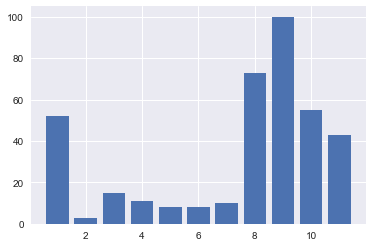

In [61]:
plt.bar( xrange(1,12),share_df.groupby("user_id_group")["time_spent_mins"].count())

<Container object of 11 artists>

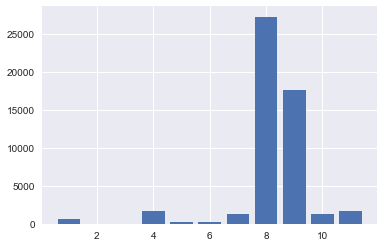

In [62]:
plt.bar( xrange(1,12),share_df.groupby("user_id_group")["time_spent_mins"].sum())

In [64]:
# share_df_with_channel = pd.get_dummies(share_df, columns=["share_channel"])
# share_df.head()

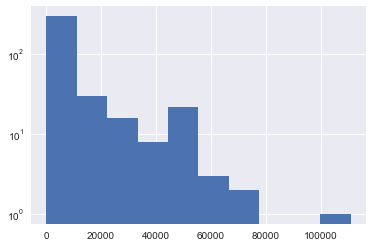

In [86]:
plt.hist(share_df["time_spent_in_seconds"])
plt.yscale("log")

<Container object of 7 artists>

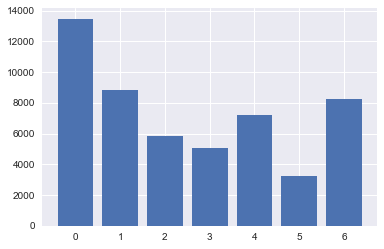

In [70]:
plt.bar(xrange(0,7),(share_df.groupby("weekday")["time_spent_mins"].sum()))

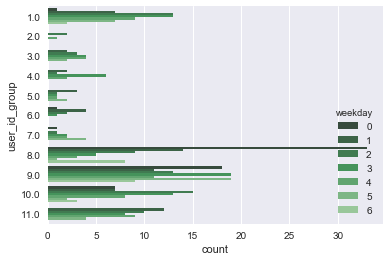

In [75]:
sns.countplot(y="user_id_group", hue="weekday", data=share_df, palette="Greens_d")

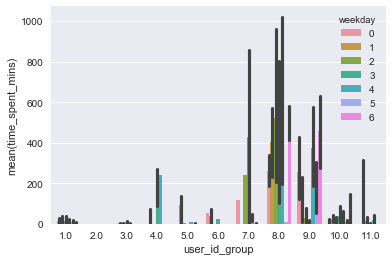

In [77]:
sns.barplot(x="user_id_group", y="time_spent_mins", hue="weekday", data=share_df)

In [81]:
new_share_df = share_df[(share_df["user_id_group"] == 8) | (share_df["user_id_group"] == 9)]
new_share_df.head()

,activity_type,user_id,rm_id,view_app_group,user_groups,shared_date,shared_hour,shared_time,title_of_content,share_channel,viewed,time_spent_in_seconds,last_activity_date,last_activity_time,weekday,hour,time_spent_mins,user_id_group
502,SHARE,4932020,2978304.0,NaN,Red River College,7-Mar-2017,19.0,19:50:02,RRC_EALN-1009 (1) Communication for Business a...,WEB,1,54240,2017-05-22,2:23:00,0,2,904.000000,9.0
508,SHARE,4932048,2978304.0,NaN,Red River College,7-Mar-2017,20.0,20:01:08,RRC_EALN-1009 (1) Communication for Business a...,WEB,1,18000,2017-05-21,9:46:00,6,9,300.000000,9.0
646,SHARE,4931956,2978304.0,NaN,Red River College,7-Mar-2017,19.0,19:38:28,RRC_EALN-1009 (1) Communication for Business a...,WEB,1,10375,2017-05-05,1:34:00,4,1,172.916667,9.0
661,SHARE,4350969,197521.0,NaN,Client Solutions,4-May-2017,3.0,3:49:29,Example Desktop with Nessus,WEB,0,0,2017-05-04,3:49:29,3,3,0.000000,8.0
704,SHARE,4369845,2978304.0,NaN,Red River College,26-Jan-2017,2.0,2:54:43,RRC_EALN-1009 (1) Communication for Business a...,WEB,1,20157,2017-04-26,3:46:00,2,3,335.950000,8.0


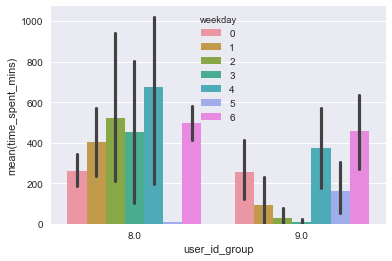

In [82]:
sns.barplot(x="user_id_group", y="time_spent_mins", hue="weekday", data=new_share_df)

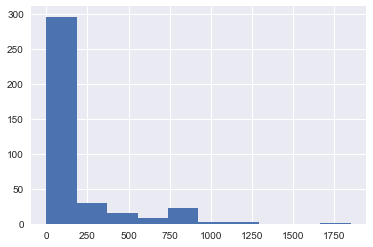

In [72]:
h = plt.hist(share_df.time_spent_mins)

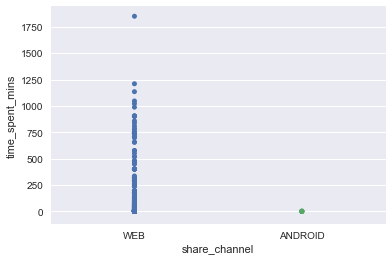

In [73]:
sns.stripplot(x="share_channel", y="time_spent_mins", data=share_df)


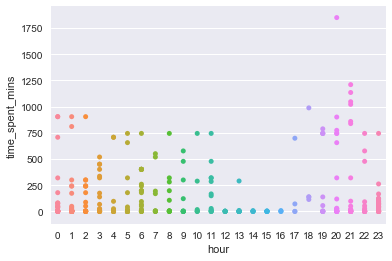

In [74]:
sns.stripplot(x="hour", y="time_spent_mins", data=share_df)


In [87]:
view_df = df[(df.activity_type == "VIEW") & (df.user_os != "NaN")]
view_df = view_df.drop(["share_channel", "user_groups", "shared_date", "shared_time", "rm_id", "shared_hour"], axis =1)


In [88]:
view_df.title_of_content.unique()
len(view_df.title_of_content.unique())

369

In [89]:
view_df.head()

,activity_type,user_id,user_os,viewing_app,view_app_group,title_of_content,viewed,time_spent_in_seconds,last_activity_date,last_activity_time,weekday,hour,time_spent_mins,user_id_group
1,VIEW,5931852,WINDOWS_7,CHROME,CHROME,Introductions and Conclusions: Set the Stage,1,285,2017-08-18,22:37:45,4,22,4.750000,11.0
2,VIEW,5931852,WINDOWS_7,CHROME,CHROME,Paragraph Structure: Find the Balance,1,1635,2017-08-18,22:00:03,4,22,27.250000,11.0
3,VIEW,5931852,WINDOWS_7,CHROME,CHROME,Paragraph Structure: Find the Balance,1,3555,2017-08-18,21:00:01,4,21,59.250000,11.0
4,VIEW,5931852,WINDOWS_7,CHROME,CHROME,Paragraph Structure: Find the Balance,1,30,2017-08-18,20:59:28,4,20,0.500000,11.0
6,VIEW,5864595,WINDOWS_7,IE11,IE11,Thesis Statements: What's the Point?,1,5,2017-08-18,20:55:11,4,20,0.083333,11.0


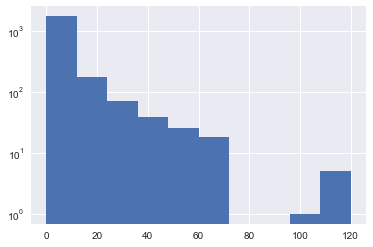

In [91]:
plt.hist(view_df.time_spent_mins)
plt.yscale("log")

In [97]:
view_df.view_app_group.unique()

array(['CHROME', 'IE11', 'SAFARI', 'EDGE', 'FIREFOX', 'MOBILE_SAFARI', nan,
       'CHROME_MOBILE'], dtype=object)

<Container object of 7 artists>

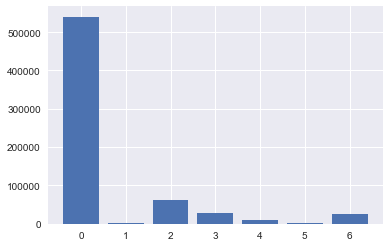

In [101]:
plt.bar(xrange(0,7), view_df.groupby("view_app_group")["time_spent_in_seconds"].sum())


<Container object of 24 artists>

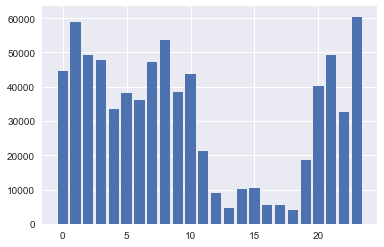

In [102]:
plt.bar(xrange(0,24), view_df.groupby("hour")["time_spent_in_seconds"].sum())


In [ ]:
def get_view_time_per_user(unique_users, view_df):
    for user in unique_users:
        temp_time = view_df["user_id"]

<Container object of 7 artists>

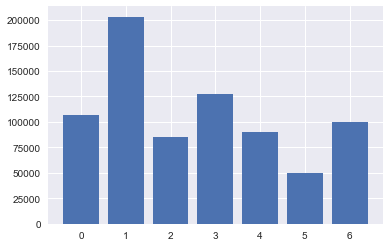

In [103]:
plt.bar(xrange(0,7), view_df.groupby("weekday")["time_spent_in_seconds"].sum())


In [ ]:
# Get the time spent on different apps
def get_time_spent(view_df):
    time_spent_secs = view_df["time_spent_in_seconds"].sum()
    view_apps = view_df["view_app_group"].unique()

    time_spent_dict = {}
    for v in view_apps:
        temp_time = view_df[view_df.view_app_group == v]["time_spent_in_seconds"].sum()
        time_spent_dict[v] = [temp_time, float(temp_time)*100/time_spent_secs]
    return time_spent_dict

get_time_spent(view_df)

In [ ]:
view_df["viewing_app"]

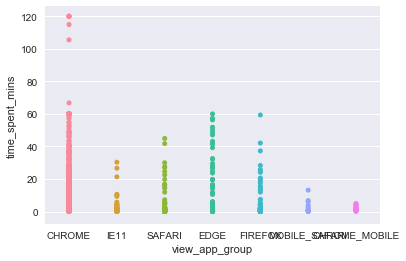

In [104]:
sns.stripplot(x="view_app_group", y="time_spent_mins", data=view_df)
#plt.bar(xrange(0,8), view_df.groupby("view_app_group")["time_spent_mins"].sum())

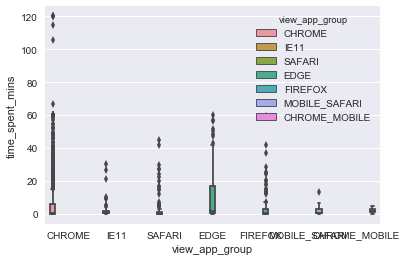

In [105]:
sns.boxplot(x="view_app_group", y="time_spent_mins", data=view_df, hue = "view_app_group")


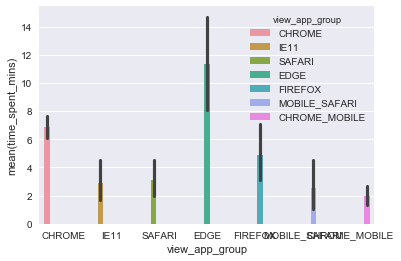

In [106]:
sns.barplot(x="view_app_group", y="time_spent_mins", data=view_df, hue = "view_app_group")


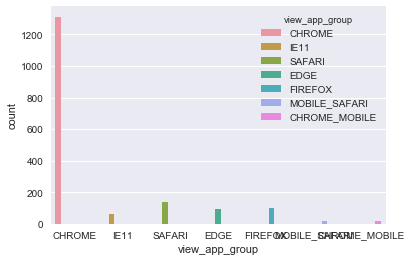

In [107]:
sns.countplot(x="view_app_group", data=view_df, hue = "view_app_group")


In [108]:
unique_view_app = view_df["viewing_app"].unique()
len(unique_view_app)

21

<Container object of 20 artists>

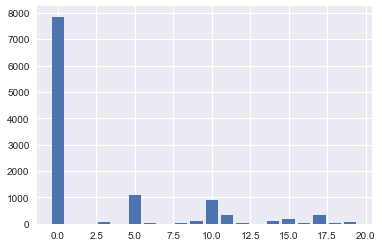

In [109]:
plt.bar(xrange(0,20),view_df.groupby("viewing_app")["time_spent_mins"].sum())

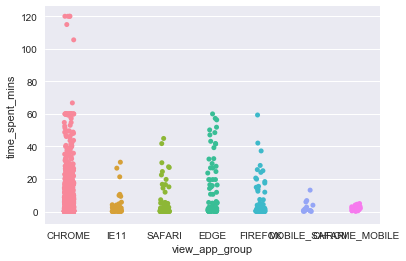

In [114]:
sns.stripplot(x=view_df["view_app_group"], y=view_df["time_spent_mins"], data=view_df, jitter=True)


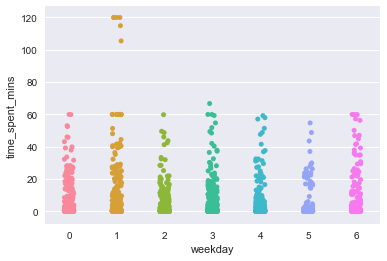

In [111]:
sns.stripplot(x=view_df["weekday"], y=view_df["time_spent_mins"], data=view_df, jitter=True)



In [112]:
user_os_list = view_df.user_os.unique()
X= view_df.as_matrix(columns = ["user_id_group","time_spent_mins","view_app_num"])

In [115]:
# clusterer = KMeans(n_clusters=7, random_state=10)
# clusterer.fit(X)

